### Decision Tree

**Importing the libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import multiprocessing
%matplotlib inline

**Importing the Dataset**

In [34]:
kyphosis = pd.read_csv('kyphosis.csv')
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


**Extracting the independent variables**

In [35]:
X = kyphosis.drop('Kyphosis',axis=1)
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


**Extracting the dependent variables**

In [36]:
y = kyphosis['Kyphosis']
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

**Data Analysis**

<Axes: xlabel='Kyphosis', ylabel='Age'>

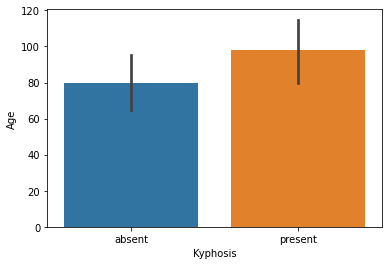

In [37]:
sns.barplot(x='Kyphosis',y='Age',data=kyphosis)

In [38]:
# Not working
# sns.pairplot(kyphosis,hue='Kyphosis',palette='Set1')  Original
# sns.pairplot(kyphosis, hue="Kyphosis", diag_kind="hist") 

**Visualizing the dataset**

<Axes: xlabel='Age', ylabel='count'>

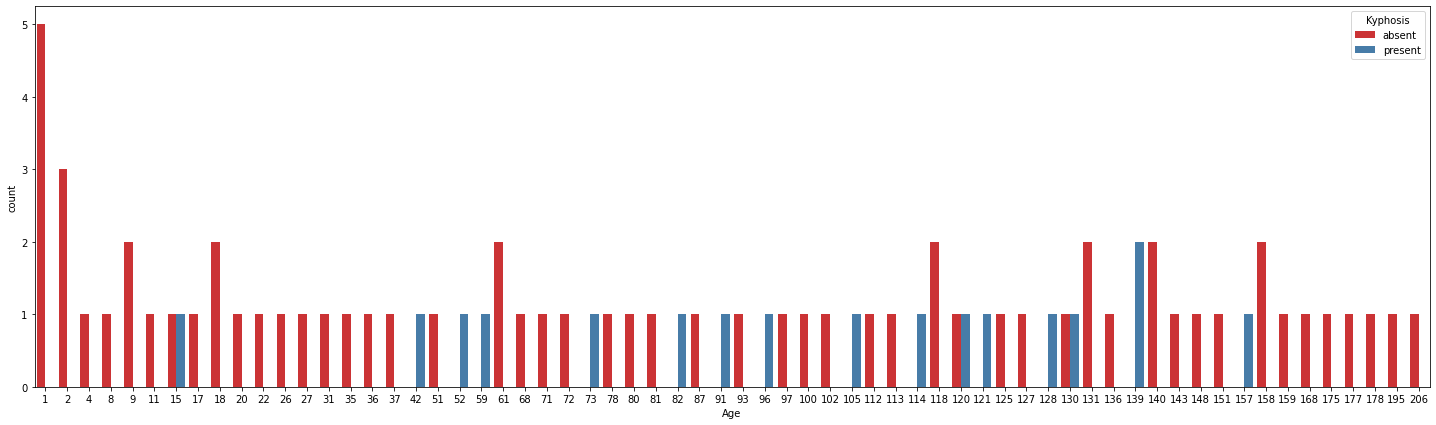

In [39]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Kyphosis',data=kyphosis,palette='Set1')

**Splitting the dataset into training and testing set**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [41]:
x = kyphosis.drop('Kyphosis',axis=1)
y = kyphosis['Kyphosis']

In [42]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [43]:
x=kyphosis.iloc[:,[1,2,3]].values

In [44]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [45]:
X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

**Training a Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Predicting the Model**

In [49]:
predictions = dtree.predict(X_test)
predictions

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

**Evaluation of the Model**

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.73      0.80        22
     present       0.14      0.33      0.20         3

    accuracy                           0.68        25
   macro avg       0.52      0.53      0.50        25
weighted avg       0.80      0.68      0.73        25



In [52]:
print(confusion_matrix(y_test,predictions))

[[16  6]
 [ 2  1]]


**Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
rfc_pred = rfc.predict(X_test)

In [55]:
print(confusion_matrix(y_test, rfc_pred))

[[19  3]
 [ 3  0]]


In [56]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25

